We are going to be doing an activity about viewing images through different filters. These filters are similar to things that happen in the brain when the images from our eyes are registered in our brain.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
import scipy.signal as signal
import numpy as n
import math

Here is an example of a picture that is only in black and white

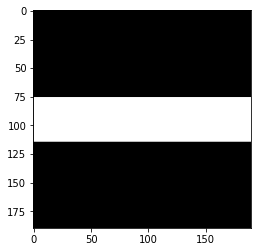

In [3]:
barImg=mpimg.imread('bar.png')
barImg = barImg[:,:,3]
imgplot = plt.imshow(barImg, cmap=cm.Greys_r)

In [7]:
img=mpimg.imread('stinkbug.png')
#extract grey values
bugImg = img[:,:,0]

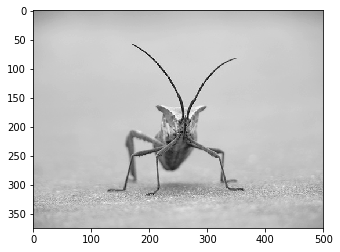

In [8]:
imgplot = plt.imshow(bugImg, cmap=cm.Greys_r)

Receptive field functions
-------------------

 In the visual pathway the images can be seen as input from our eyes focusing on the center of our vision. This is the equation for it (you don't need to know this!)

$$\phi(x,y) = \frac{1}{2\pi\sigma^2}\exp{(-\frac{1}{2\pi\sigma^2}(x^2+ y^2))}$$

In [9]:
def gaussian2D(x, y, sigma):
    return (1.0/(1*math.pi*(sigma**2)))*math.exp(-(1.0/(2*(sigma**2)))*(x**2 + y**2))

"""make matrix from function"""
def receptiveFieldMatrix(func):
    h = 30
    g = n.zeros((h,h))
    for xi in range(0,h):
        for yi in range(0,h):
            x = xi-h/2
            y = yi-h/2
            g[xi, yi] = func(x,y);
    return g

def plotFilter(fun):
    g = receptiveFieldMatrix(fun) 
    plt.imshow(g, cmap=cm.Greys_r)

The gaussian function is circular symmetric, meaning it is doing the same thing around a circle.

This filter cancels out higher frequencies, thus blurring the image.

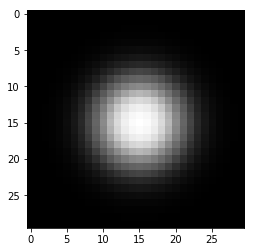

In [10]:
plotFilter(lambda x,y:gaussian2D(x,y,4))


Convolution is the process of applying the filter to the input image.
$$\int \int I(x',y')\phi(x-x',y-y')dx'dy'$$

When applying this filter, the result of the convolution can be visualized in an image.


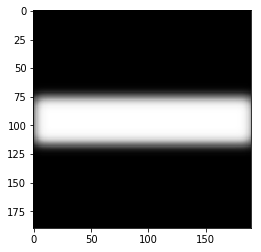

In [11]:
Img_barGaussian = signal.convolve(barImg,receptiveFieldMatrix(lambda x,y: gaussian2D(x,y,5)), mode='same')

imgplot = plt.imshow(Img_barGaussian, cmap=cm.Greys_r)

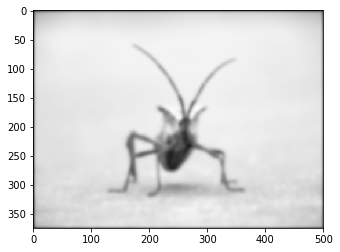

In [12]:
Img_bugGaussian = signal.convolve(bugImg,receptiveFieldMatrix(lambda x,y: gaussian2D(x,y,3)), mode='same')
imgplot = plt.imshow(Img_bugGaussian, cmap=cm.Greys_r)

Difference of Gaussians
---------------------

The mexican hat function is a difference between two of the function above, which leads to a filter that happens in certain cells in your eye. It can be seen as a basic edge detector.

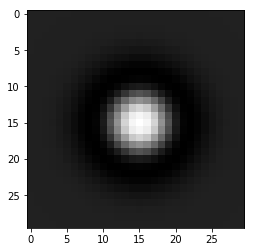

In [13]:
def mexicanHat(x,y,sigma1,sigma2): 
    return gaussian2D(x,y,sigma1) - gaussian2D(x,y,sigma2)

plotFilter(lambda x,y: mexicanHat(x,y,3,4))

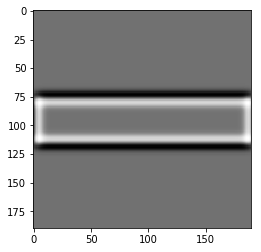

In [18]:
Img_barHat = signal.convolve(barImg,receptiveFieldMatrix(lambda x,y:mexicanHat(x,y,3,4)), mode='same')

imgplot = plt.imshow(Img_barHat, cmap=cm.Greys_r)

In [16]:
Img_bugHat = signal.convolve(bugImg,receptiveFieldMatrix(lambda x,y: mexicanHat(x,y,2,3)), mode='same')

imgplot = plt.imshow(Img_bugHat, cmap=cm.Greys_r)

Gabor functions
---------------

Gabor functions are used to detect edges with a specific orientation in images. There are parts in the brain that see an image through these gabor functions and are found throughout a part of your eye.

 There are two different types of gabor function:
 $$g_s(x):=sin(\omega_x x + \omega_y y)\exp{\{-\frac{x^2+y^2}{2\sigma^2}\}}$$
 $$g_c(x):=cos(\omega_x x + \omega_y y)\exp{\{-\frac{x^2+y^2}{2\sigma^2}\}}$$



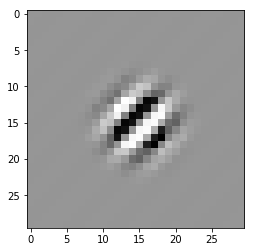

In [19]:
def oddGabor2D(x,y,sigma,orientation):
    return math.sin(x + orientation*y) * math.exp(-(x**2 + y**2)/(2*sigma))

def evenGabor2D(x,y, sigma, orientation):
    return math.cos(x + orientation*y) * math.exp(-(x**2 + y**2)/(2*sigma))

plotFilter(lambda x,y: oddGabor2D(x,y,7,1))

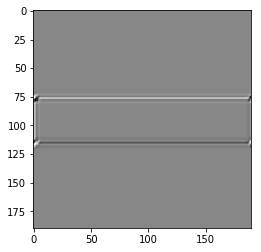

In [20]:
Img_barOddGabor = signal.convolve(barImg,receptiveFieldMatrix(lambda x,y: oddGabor2D(x,y,5,1)), mode='same')

imgplot = plt.imshow(Img_barOddGabor, cmap=cm.Greys_r)

In [21]:
Img_bugOddGabor = signal.convolve(bugImg,receptiveFieldMatrix(lambda x,y: oddGabor2D(x,y,5,1)), mode='same')

In the following image one can see the edge orientations appear in the part of the eye.

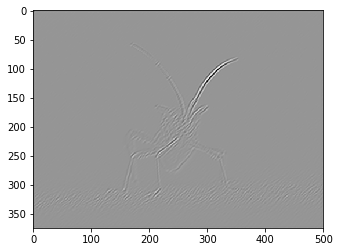

In [22]:
imgplot = plt.imshow(Img_bugOddGabor, cmap=cm.Greys_r)

Using the previous filter (the edge defining one) as an input to the gabor we obtain different results.

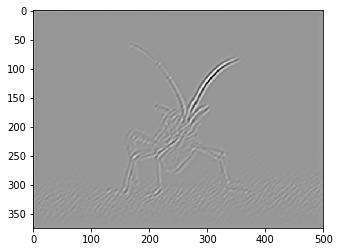

In [23]:
Img_bugOddGaborEdge = signal.convolve(Img_bugHat,receptiveFieldMatrix(lambda x,y: oddGabor2D(x,y,5,1)), mode='same')

imgplot = plt.imshow(Img_bugOddGaborEdge, cmap=cm.Greys_r)

Here is an example of the other gabor filter

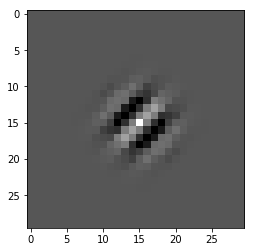

In [49]:
plotFilter(lambda x,y: evenGabor2D(x,y,7,1))

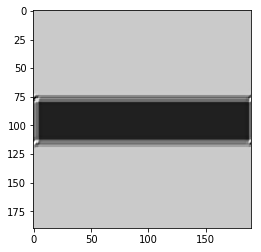

In [24]:
Img_barEvenGabor = signal.convolve(barImg,receptiveFieldMatrix(lambda x,y: evenGabor2D(x,y,5,1)), mode='same')

imgplot = plt.imshow(Img_barEvenGabor, cmap=cm.Greys_r)

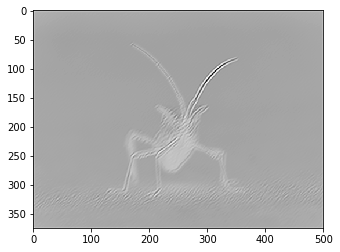

In [25]:
Img_bugEvenGabor = signal.convolve(bugImg,receptiveFieldMatrix(lambda x,y: evenGabor2D(x,y,5,1)), mode='same')

imgplot = plt.imshow(Img_bugEvenGabor, cmap=cm.Greys_r)

Quadrature Pairs
------------------

Now let's combine both gabor filters to see what will happen. 

In [26]:
def edgeEnergy(x,y,sigma, orientation):
    g1= oddGabor2D(x,y,sigma,orientation)
    g2= evenGabor2D(x,y,sigma,orientation)
    return(g1**2+g2**2)


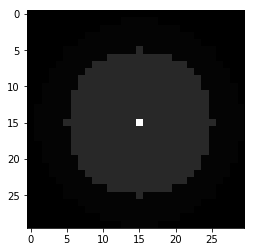

In [27]:
plotFilter(lambda x,y:edgeEnergy(x,y,50,0))

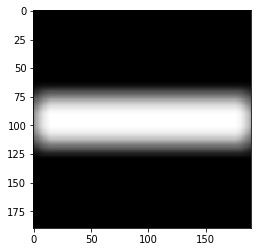

In [28]:
Img_barEdgeEnergy = signal.convolve(barImg,receptiveFieldMatrix(lambda x,y: edgeEnergy(x,y,100,1)), mode='same')
imgplot = plt.imshow(Img_barEdgeEnergy, cmap=cm.Greys_r)

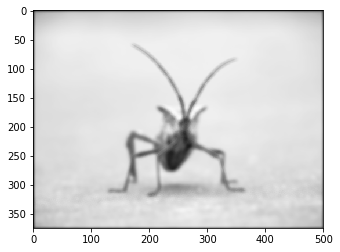

In [29]:
Img_bugEdgeEnergy = signal.convolve(bugImg,receptiveFieldMatrix(lambda x,y: edgeEnergy(x,y,10,1)), mode='same')
imgplot = plt.imshow(Img_bugEdgeEnergy, cmap=cm.Greys_r)

Now let's have some fun: We have some different images you can use. Try them out and see what is different between them. Write down some observations you see for each image and the similarities/differences between them. 

Here are some of the choices: 

change 'stinkbug.png' into your choice of animal:
turtle.jpg, turtle2.jpg, zebra.png, doge.png, jaguar.png, leopard.png, mexicanhat.jpg


In [30]:
img=mpimg.imread('stinkbug.png')
#extract grey values
bugImg = img[:,:,0]

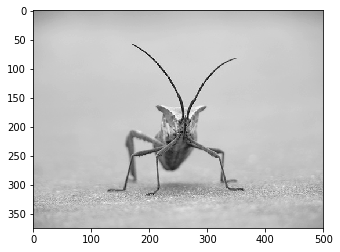

In [31]:
#grey image
imgplot = plt.imshow(bugImg, cmap=cm.Greys_r)

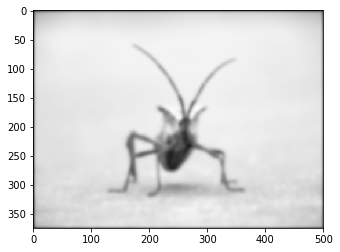

In [32]:
#first filter to blur out sides of vision
Img_bugGaussian = signal.convolve(bugImg,receptiveFieldMatrix(lambda x,y: gaussian2D(x,y,3)), mode='same')
imgplot = plt.imshow(Img_bugGaussian, cmap=cm.Greys_r)

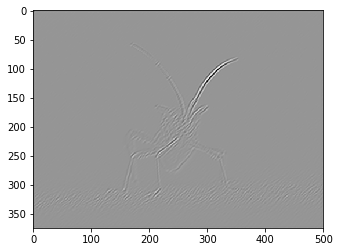

In [33]:
#odd gabor
Img_bugOddGabor = signal.convolve(bugImg,receptiveFieldMatrix(lambda x,y: oddGabor2D(x,y,5,1)), mode='same')
imgplot = plt.imshow(Img_bugOddGabor, cmap=cm.Greys_r)

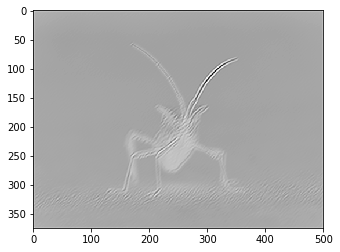

In [34]:
#even gabor
Img_bugEvenGabor = signal.convolve(bugImg,receptiveFieldMatrix(lambda x,y: evenGabor2D(x,y,5,1)), mode='same')

imgplot = plt.imshow(Img_bugEvenGabor, cmap=cm.Greys_r)

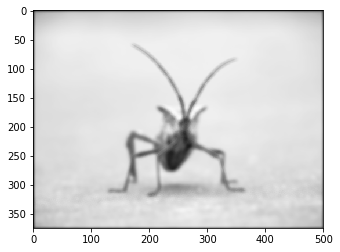

In [35]:
#combining both gabor -- quadrature pair
Img_bugEdgeEnergy = signal.convolve(bugImg,receptiveFieldMatrix(lambda x,y: edgeEnergy(x,y,10,1)), mode='same')
imgplot = plt.imshow(Img_bugEdgeEnergy, cmap=cm.Greys_r)